# atelier.lumfun - Introduction
### Introduction to the Atelier's luminosity function classwith a strong emphasis on quasar luminosity functions

In [1]:
# General imports 
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM

# Importing the luminosity function module
from atelier import lumfun

## 1) Introduction to the luminosity function object
### 1.1) Instantiating the luminosity function object
#### For this example we use the McGreer+2013 quasar luminosity function
ADS reference: https://ui.adsabs.harvard.edu/abs/2013ApJ...768..105M/abstract
The quasar luminosity function in the paper is defined using a broken double power law with the luminosity in magnitudes. An implementation of a magnitude based broken double power law luminosity function already exists in the *lumfun* module. 

In [2]:
print(lumfun.DoublePowerLawLF.__doc__)

 Luminosity function, which takes the functional form of a double
    power law with the luminosity in absolute magnitudes.

    The luminosity function has four main parameters:

    - "phi_star": the overall normalization
    - "lum_star": the break luminosity/magnitude where the power law slopes
      change.
    - "alpha": the first power law slope
    - "beta": the second power law slope

    


The four main parameters need to be specified either as parameters or as functions. In this example only the source density normalization is a function, which depends on redshift (redsh), a z=6 normalized value of the source density *log_phi_star* and a parameter *k*.

In [3]:
# Define the source density normalization as in McGreer+2013
def phi_star(redsh, log_phi_star, k):
    return 10 ** (log_phi_star + k * (redsh - 6))


log_phi_star = lumfun.Parameter(-8.94, 'log_phi_star', one_sigma_unc = [0.24, 0.20])
k = lumfun.Parameter(-0.47, 'k', vary=False)

We begin with defining the function for *phi_star* and its parameters. Redshift (redsh) and luminosity (lum) are always arguments of the luminosity function and do not require further definition. However, we need to define and provide *log_phi_star* and *k*. 

For these parameters we use the **lumfun.Parameter** class which has the following attributes:

In [4]:
print(lumfun.Parameter.__doc__)

 A class providing a data container for a parameter used in the
    luminosity function class.

    Attributes
    ----------
    value : float
        Value of the parameter
    name : string
        Name of the parameter
    bounds : tupler
        Bounds of the parameter, used in fitting
    vary : bool
        Boolean to indicate whether this parameter should be varied, used in
        fitting
    one_sigma_unc: list (2 elements)
        1 sigma uncertainty of the parameter.

    


In the next step we define the other three main parameters and instantiate the broken double power law luminosity function (*atelier.lumfun.DoublePowerLawLF*).

In [5]:
lum_star = lumfun.Parameter(-27.21, 'lum_star', one_sigma_unc = [0.33, 0.27])
alpha = lumfun.Parameter(-2.03, 'alpha', vary=True, one_sigma_unc = [0.14, 0.15])

# The beta slope does not have an uncertainty as it set to -4 in McGreer+2013
beta = lumfun.Parameter(-4, 'beta', bounds=[-8, -3])

# Wrapping the parameters in a dictionary
parameters = {'log_phi_star': log_phi_star, 'k': k, 'lum_star': lum_star,
              'beta': beta, 'alpha': alpha}
# Wrapping the parameter functions (param_functions) in a dictionary
param_functions = {'phi_star': phi_star}

# The luminosity function type attribute is used in specific calculations based on the luminosity function
# only lum_type = 'M1450' has a special meaning at the moment.
lum_type = 'M1450'

mcgreer2013 = lumfun.DoublePowerLawLF(parameters, param_functions, lum_type=lum_type)

[INFO]---------------------------------------------------
[INFO] Performing initialization checks 
[INFO]---------------------------------------------------
[INFO]---------------------------------------------------
[INFO] Main parameter phi_star is described by a function.
[INFO] The function parameters are: ['redsh', 'log_phi_star', 'k']
[INFO] All parameters are supplied.
[INFO] Parameters "lum" and "redsh" were ignored as they are luminosity function arguments.
[INFO]---------------------------------------------------
[INFO] Main parameter lum_star is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter alpha is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter beta is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Initialization check passed.
[INFO]---------------------------------------------------


**Important**
With the instantiation of the luminosity function object a verbose check is carried out in which the code automatically checks if all *main parameters* have been either defined as parameters or as a function of parameters. 

### 1.2) Basic calculations
### 1.2.1) Calculating the luminosity function
To retrieve values of the luminosity function one can either directly call it supplying a luminosity and redshift (e.g., *mcgreer2013(M1450,redsh)*) or use the *.evaluate(lum,redsh)* function. In both cases either the luminosity or the redshift can also be specified as a numpy.ndarray instead of a single float value. 

In [6]:
# Defining a magnitude array
M1450 = np.arange(-29, -22, 0.01)
# Defining a redshift array
z= np.arange(4, 6, 0.1)

# Calling the luminosity function with a luminosity and a redshift value produces one output value
print(mcgreer2013(-27, 4.9))

# Calling the luminosity function with a np.ndarray in luminosity and a redshift value produces a np.ndarray
print(mcgreer2013(M1450, 4.9).shape)

# Calling the luminosity function with a np.ndarray in redshift and a magnitude value produces a np.ndarray
print(mcgreer2013(-27, z).shape)


2.7377613276931382e-09
(700,)
(20,)


Let us now display the McGreer+2013 quasar luminosity function in comparison to the binned values from the paper, basically reproducing Fig.16 of the publication. 

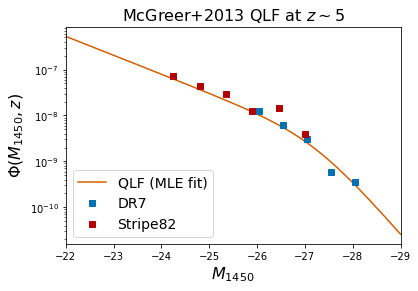

In [7]:
# Binned QLF data from the publication

dr7 = {'M1450':np.array([-28.05, -27.55, -27.05, -26.55, -26.05]),
       'logPhi':np.array([-9.45, -9.24, -8.51, -8.20, -7.9]),
       'simga_logPhi':np.array([0.21, 0.26, 0.58, 0.91, 1.89])*1e-9}

str82 = {'M1450':np.array([-27.0, -26.45, -25.9, -25.35, -24.8, -24.25]),
       'logPhi':np.array([-8.4, -7.84, -7.9, -7.53, -7.36, -7.14]),
       'simga_logPhi':np.array([2.81, 6.97, 5.92, 10.23, 11.51, 19.9])*1e-9}



# Color definition for plotting 
vermillion = (213/255., 94/255., 0)
dblue = (0, 114/255., 178/255.)
dred = (179/255., 0, 0)

qlf = mcgreer2013(M1450, 4.9)

plt.plot(M1450, qlf, lw=1.5, color=vermillion, label='QLF (MLE fit)')
plt.plot(dr7['M1450'], 10**dr7['logPhi'], 's', color=dblue, label='DR7')
plt.plot(str82['M1450'], 10**str82['logPhi'], 's', color=dred, label='Stripe82')
plt.xlim(-22, -29)

# Make the plot nice
plt.semilogy()
plt.ylabel('$\Phi(M_{1450},z)$', fontsize=16)
plt.xlabel('$M_{1450}$', fontsize=16)
plt.title('McGreer+2013 QLF at $z\sim5$', fontsize=16)
plt.legend(loc=3, fontsize=14)
plt.show()

### 1.2.2) Calculating the number of quasars in a redshift and luminosity range (per steradian)
The built-in class function *.integrate_over_lum_redsh* performs the double integral of the quasar luminosity function using the provided input parameters. For this calculation we need to specify a cosmology as the differential comoving solid volume element, which can be provided directly, depends on it.

In [8]:
print(mcgreer2013.integrate_over_lum_redsh.__doc__)

Calculate the number of sources described by the luminosity function
        over a luminosity and redshift interval in units of per steradian.

        Either a cosmology or dVdzdO have to be supplied.

        :param lum_range: Luminosity range
        :type lum_range: tuple
        :param redsh_range: Redshift range
        :type redsh_range: tuple
        :param dVdzdO: Differential comoving solid volume element (default =
            None)
        :type dVdzdO: function
        :param selfun: Selection function (default = None)
        :type selfun: atelier.selfun.QsoSelectionFunction
        :param cosmology: Cosmology (default = None)
        :type cosmology: astropy.cosmology.Cosmology
        :param kwargs:
        :return: :math:`N = \int\int\Phi(L,z) (dV/(dz d\Omega)) dL dz`
        :rtype: float
        


In [11]:
cosmology = FlatLambdaCDM(H0=70, Om0=0.272)

n_qso_per_steradian = mcgreer2013.integrate_over_lum_redsh([-29,-24],[5,5.5], cosmology=cosmology)
print('There are {:.5f} quasars per steradian within z=5-5.5 and with M1450=-29 to -24 (using romberg integration)'.format(n_qso_per_steradian))

n_qso_per_steradian = mcgreer2013.integrate_over_lum_redsh_simpson([-29,-24],[5,5.5], cosmology=cosmology)
print('There are {:.5f} quasars per steradian within z=5-5.5 and with M1450=-29 to -24 (using Simpsons rule on a grid)'.format(n_qso_per_steradian))

There are 936.08722 quasars per steradian within z=5-5.5 and with M1450=-29 to -24 (using romberg integration)
There are 936.08637 quasars per steradian within z=5-5.5 and with M1450=-29 to -24 (using Simpsons rule on a grid)


### 1.2.3) Calculating the quasar number density over a luminosity range (per Mpc^3)
The built-in class function *.integrate_lum* performs this integral using the provided input parameters.

In [10]:
print(mcgreer2013.integrate_lum.__doc__)

Calculate the volumetric source density described by the luminosity
        function at a given redshift and over a luminosity interval in units of
        per Mpc^3.

        :param redsh: Redshift
        :type redsh: float
        :param lum_range: Luminosity range
        :type lum_range: tuple
        :param kwargs:
        :return: :math:`\int \Phi(L,z) dL`
        :rtype: float
        


In [11]:
n_qso_per_Mpc3 = mcgreer2013.integrate_lum(4.9,[-29,-24])
print('The quasar density (in Mpc^-3) over M1450=-29 to -24 is {:.2e} at redshift z=4.9'.format(n_qso_per_Mpc3))

The quasar density (in Mpc^-3) over M1450=-29 to -24 is 8.53e-08 at redshift z=4.9


### 1.2.4) Calculating the quasar number density over a luminosity range (per steradian)
The built-in class function *.redshift_density* performs this integral using the provided input parameters. This quantity is rarely used in normal calculations based on the quasar luminosity function.

In [12]:
print(mcgreer2013.redshift_density.__doc__)

Calculate the volumetric source density described by the luminosity
        function at a given redshift and over a luminosity interval in units of
        per steradian per redshift.

        :param redsh: Redshift
        :type redsh: float
        :param lum_range: Luminosity range
        :type lum_range: tuple
        :param dVdzdO: Differential comoving solid volume element (default =
            None)
        :type dVdzdO: function
        :param kwargs:
        :return: :math:`\int \Phi(L,z) (dV/dz){d\Omega} dL`
        :rtype: float
        


In [13]:
dVdzdO = lumfun.interp_dVdzdO([4.0,6.0], cosmology)


n_qso_per_steradian_per_z = mcgreer2013.redshift_density(4.9,[-29,-24],dVdzdO)
print('The quasar density (per steradian and per redshift(!)) over M1450=-29 to -24 is {:.2e} at redshift z=4.9'.format(n_qso_per_steradian_per_z))

The quasar density (per steradian and per redshift(!)) over M1450=-29 to -24 is 2.80e+03 at redshift z=4.9


## 1.3) Calculating the ionizing emissivity at 1450A (or 912A)
Another built-in class function, which is only defined for broken double power laws and single power laws (both based on magnitude) and for quasar luminosity functions with *lum_type = 'M1450'* is *.calc_ionizing_emissivity_at_1450A*. To properly test this function and compare it with published results on the ionizing emissivity we use the pre-defined quasar luminosity function (single power law parametrization) of Wang+2019.

ADS reference: https://ui.adsabs.harvard.edu/abs/2019ApJ...884...30W/abstract

In [14]:
wang2019spl = lumfun.WangFeige2019SPLQLF()

[INFO]---------------------------------------------------
[INFO] Performing initialization checks 
[INFO]---------------------------------------------------
[INFO]---------------------------------------------------
[INFO] Main parameter phi_star is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter alpha is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Main parameter lum_ref is supplied as a normal parameter.
[INFO]---------------------------------------------------
[INFO] Initialization check passed.
[INFO]---------------------------------------------------


We use the same integration boundaries (M1450=-30 to -28) at a redshift of z=6.7

In [15]:
e1450 = wang2019spl.calc_ionizing_emissivity_at_1450A(6.7, [-30,-18])

# Adopting a power law slope of -0.6 we scale the ionizing emissivity at 1450A to 912A (Lyman break)
e912 = e1450*(1450./912)**-0.6
print('Calculated ionizing emissivity at 1450A e1450={:.2e}'.format(e1450))
print('Rescaled ionizing emissivity to 912A e912={:.2e}'.format(e912))
print('Ionizing emissivity at 912A calculated in Wang2019 for the single power law QLF e912=2.10e+23')

Calculated ionizing emissivity at 1450A e1450=2.77e+23
Rescaled ionizing emissivity to 912A e912=2.10e+23
Ionizing emissivity at 912A calculated in Wang2019 for the single power law QLF e912=2.10e+23


## 2) Sampling from the luminosity function
A built-in class function allows to sample sources from a luminosity function. The sampling is done in a two step process. 1) The redshift range is divided into small bins and the number of expected sources per bin is calculated. 2) A cumulative distribution of the quasar luminosity function is calculated at the redshift bin middle and the number of expected sources for the redshift bin is taken.
Sources for all bins are concatenated and returned. 

**Note!**
This sampling routine is in large part inspired by
https://github.com/imcgreer/simqso/blob/master/simqso/lumfun.py
, lines 219 and following.

In [16]:
print(mcgreer2013.sample.__doc__)

Sample the luminosity function over a given luminosity and
            redshift range.

        This sampling routine is in large part adopten from
        https://github.com/imcgreer/simqso/blob/master/simqso/lumfun.py
        , lines 219 and following.

        If the integral over the luminosity function does not have an
        analytical implementation, integrals are calculated using
        integrate.romberg, which can take a substantial amount of time.

        :param lum_range: Luminosity range
        :type lum_range: tuple
        :param redsh_range: Redshift range
        :type redsh_range: tuple
        :param cosmology: Cosmology (default = None)
        :type cosmology: astropy.cosmology.Cosmology
        :param sky_area: Area of the sky to be sampled in square degrees
        :type sky_area: float
        :param seed: Random seed for the sampling
        :type seed: int
        :param lum_res: Luminosity resolution (default = 1e-2, equivalent to
            100 bins)
   

In [17]:
Mrange = [-29, -24]
zrange = [5.0, 5.5]
sky_area = 10000

sample_M, sample_z = mcgreer2013.sample(Mrange, zrange, cosmology, sky_area)

[INFO] Integration returned 2851 sources


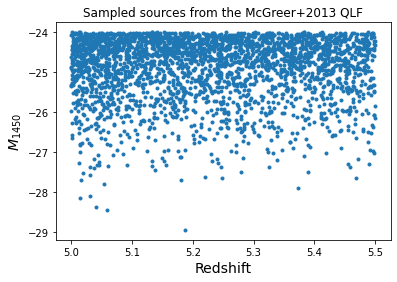

In [18]:
plt.plot(sample_z, sample_M, '.')
plt.xlabel('Redshift', fontsize=14)
plt.ylabel('$M_{1450}$', fontsize=14)
plt.title('Sampled sources from the McGreer+2013 QLF')
plt.show()